In [2]:
library(tidyverse)
library(reshape2)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
setwd("/data/yangy34/projects/SARS2_host_derived_insertions/Figure1")

In [7]:
##########################################
######### Figure 1 right part ############
##########################################

bg_struct_annot<-read.table("background.RNA_struct.annot.bed", header=F, sep ="\t")

countStems <- function(Insertions_All){
    count <- 0
    for(i in Insertions_All){
        cur_pos = bg_struct_annot %>% filter(V2==i)
        if((cur_pos$V4 == "S") | (cur_pos$V4 == "S,S")){
          count <- count + 1
        }
    }
    return(count)
}

plotStemTest <- function(host, mode){
    if(host=="human"){
        ref = "Homo_sapiens"
        x_lowlim = 30
        x_uplim = 100
    }else{
        ref = "Chlorocebus_sabaeus"
        x_lowlim = 140
        x_uplim = 400
    }

    infile=paste0(host,".chimeric_junction.RNA_struct.annot.bed")
    dt = read.table(infile, col.names=c("Ref", "Start", "End", "JuncPattern", "Struct"))
    dt <- dt %>% separate(JuncPattern, c("JunctionID", "Pattern"), sep="[.]")

    if(mode=="sh"){
        target_pattern = "sh"
        min_val=1
        max_val=29902-50
    }else{
        target_pattern = "hs"
        min_val=51
        max_val=29902
    }
    dt_1 <- dt %>% filter(Pattern==target_pattern)
    Insertions_All <- dt_1[,2]

    #Real data in Stems
    StemsRealData<-countStems(Insertions_All)
    SimulationStems<-vector()
    for (j in seq(1, 1000)){
    InsPos<-floor(runif(length(Insertions_All), min = min_val, max = max_val))
    SimulationStems<-c(SimulationStems, countStems(InsPos))
    }

    #p-value
    pvalueStems <-length(SimulationStems[SimulationStems < StemsRealData])/1000

    #plot
    InsertionsInStemsPlot<-ggplot()+
    geom_histogram(aes(SimulationStems,
                    after_stat(count*100/sum(count))),
                    fill = "#525252",
                    binwidth = 1, alpha =0.5)+
    geom_vline(xintercept = StemsRealData, color = "#ed1c24", size=3 )+
    scale_x_continuous(expand = c(1, 1), name ="Number of junction sites in Stems")+
    scale_y_continuous(expand = c(0, 0.1), name = "Percentage (%)")+
    theme_classic()+
    theme(axis.text = element_text(size = 15),
          axis.title = element_text(size = 15),
          plot.margin=unit(c(0.3,0.2,0.3,0.2), "cm")) +
    ggtitle(paste(host,"_",mode,"_", pvalueStems, StemsRealData))
    InsertionsInStemsPlot
}

p1 <- plotStemTest("human", "hs")
p2 <- plotStemTest("human", "sh")
p3 <- plotStemTest("monkey", "hs")
p4 <- plotStemTest("monkey", "sh")

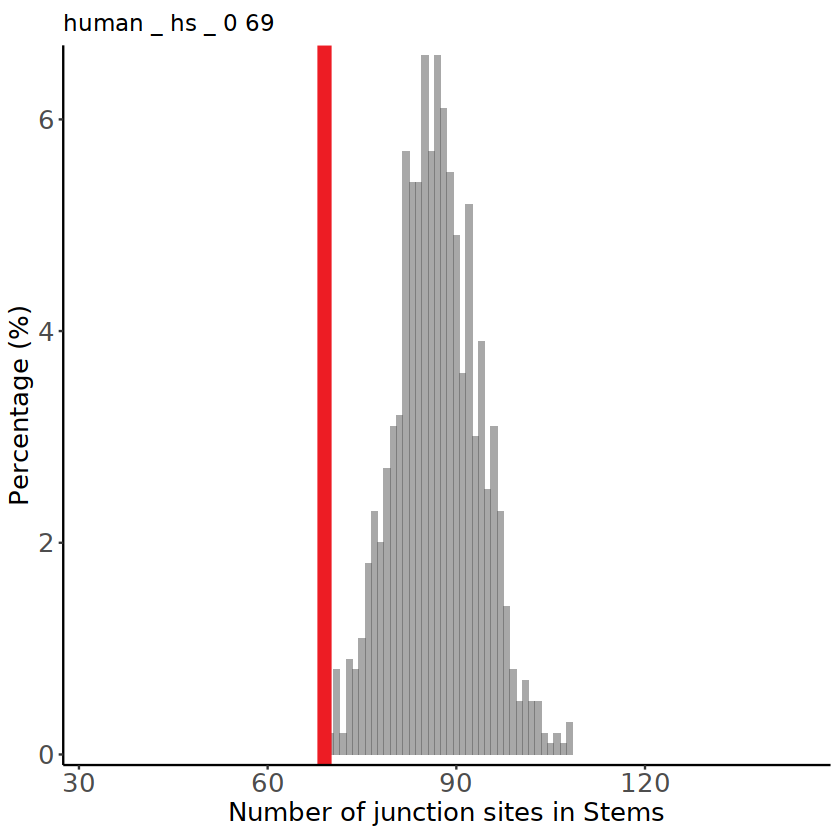

In [6]:
p1

In [ ]:
pdf("Figure_1_right_part.pdf"), width=15, height=48)
p1 / p2 / p3 / p4
dev.off()